#### JupyterNotebook Gruppe A
# Untersuchung der Zusammensetzung der Bevölkerung im Zuge des Bevölkerungsanstieges der Stadt Magdeburg seit 2004 bis 2017


## Inhaltsverzeichnis
1. Einleitung und Forschungsfrage
2. Datenaufbereitung
3. Berechnungen und Ergebnisse 
<br>3.1. Anteile der jüngeren und Älteren Bevölkerung in Magdeburg in den Jahren 2004, 2010 und 2017 <br/>
3.2 Segregationsindex für alle drei Altersgruppen in den Jahren 2004, 2010 und 2017 <br>
3.3 Anteile der Ausländischen Bevölkerung in den Jahren 2004, 2010 und 2017 <br>
3.4 Segregationsindex für die Ausländische Bevölkerung in den Jahren 2004, 2010 und 2017 <br/>
3.5 Verteilung der Anzahl der Ausländischen Bevölkerung in den Stadtteilen <br>
3.6 Korrelation zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter <br>
3.7 Anteile der männlichen und weiblichen Bevölkerung in Magdeburg
4. Ergebnisse <br/>


## 1. Einleitung und Forschungsfrage

2004 hatte Magdeburg mit 226.675  Einwohnern den geringsten Einwohnerwert seit der Wiedervereinigung 1990 erreicht (Quelle: https://www.magdeburg.de/PDF/Heft_101_Bev%C3%B6lkerungsbrosch%C3%BCre_2018.PDF?ObjSvrID=37&ObjID=31050&ObjLa=1&Ext=PDF&WTR=1&_ts=1530855955, S. 11 ). Seitdem ist die Bevölkerungszahl wieder kontinuierlich gestiegen. 2017 lebten mit 241.769 Einwohnern 6,24% mehr Menschen in der Stadt als noch 2004. 

Die 5. Regionalisierte Bevölkerungsprognose (RBP) für Sachsen-Anhalt ging 2008 noch von einer Stadtbevölkerung von 232.154 Einwohnern für das Jahr 2017 aus. Diese Prognose ging mit einem stetigen Bevölkerungsrückgang in den darauffolgenden Jahren einher. (Quelle: https://www.destatis.de/GPStatistik/servlets/MCRFileNodeServlet/STHeft_derivate_00000013/6A111_2008_2025.pdf, S. 25). 

Der 2006 von der Bertelsmann Stiftung publizierte “Wegweiser Demographischer Wandel 2020” ging sogar noch einen Schritt weiter und prognostizierte für das Jahr 2020 einen Bevölkerungsrückgang um 11,2%, verglichen mit dem Stichjahr 2003. Dies entspräche, bei einer Bevölkerung von ursprünglich 227.129 Menschen (Stand: 2003), nur noch 201.691 Einwohner. (Quelle: http://shrinking.ums-riate.fr/Ressources/Chap_07/SCH_06.pdf, S. 43)

Gleichzeitig reduzierte sich die Bevölkerung in Sachsen-Anhalt zwischen 2016 und 2017 um -0,6%, von 2,236 Mio. auf 2,223 Mio. Menschen. (Quelle: https://www.destatis.de/DE/PresseService/Presse/Pressemitteilungen/2018/09/PD18_347_12411.html). Im selben Zeitraum wuchs die Bevölkerung der Landeshauptstadt Magdeburg von 238.136 (2016) auf 241.769 (2017) Quelle: https://www.magdeburg.de/PDF/Heft_101_Bev%C3%B6lkerungsbrosch%C3%BCre_2018.PDF?ObjSvrID=37&ObjID=31050&ObjLa=1&Ext=PDF&WTR=1&_ts=1530855955, S. 11 ). Das bedeutet einen Bevölkerungsanstieg von 1,5%. Das bundesdeutsche Bevölkerungswachstum betrug im selben Zeitraum +0,3 % (Quelle: https://www.destatis.de/DE/PresseService/Presse/Pressemitteilungen/2018/09/PD18_347_12411.html).



#### Grafik der Bevölkerungsentwicklung in Magdeburg von 2004 bis 2017 

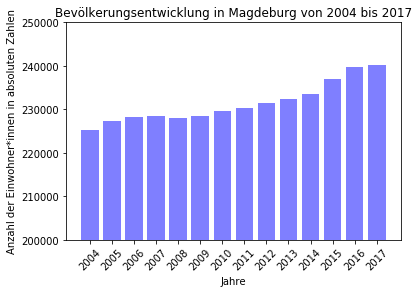

In [19]:
#Importieren des Python-Pakets Pandas sowie des Numpy-Pakets
import pandas as pd
import numpy as np

#Einlesen des Forschungsdatensatzes der Version 007
magdeb007 = pd.read_csv("MagdeburgBereinigterDatensatzVers007.csv", sep = ";", decimal=",")

#Importieren des Python-Pakets matplot.lib
import matplotlib.pyplot as plt

#Liste/Dictionary erstellen für die Einwohnerentwicklung von 2004 bis 2017 
einwohner04bis17 = (sum(magdeb007['EW_2004']), 
                    sum(magdeb007['EW_2005']),
                    sum(magdeb007['EW_2006']),
                    sum(magdeb007['EW_2007']),
                    sum(magdeb007['EW_2008']),
                    sum(magdeb007['EW_2009']),
                    sum(magdeb007['EW_2010']),
                    sum(magdeb007['EW_2011']),
                    sum(magdeb007['EW_2012']),
                    sum(magdeb007['EW_2013']),
                    sum(magdeb007['EW_2014']),
                    sum(magdeb007['EW_2015']),
                    sum(magdeb007['EW_2016']),
                    sum(magdeb007['EW_2017']))


jahre = ('2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017')
y_pos = np.arange(len(jahre))

 
plt.bar(y_pos, einwohner04bis17, align='center', alpha=0.5, color='Blue')
plt.xticks(y_pos, jahre, rotation=45)
plt.ylabel('Anzahl der Einwohner*innen in absoluten Zahlen')
plt.xlabel('Jahre')
plt.title('Bevölkerungsentwicklung in Magdeburg von 2004 bis 2017')
plt.ylim((200000,250000))

plt.show()


Die Projektgruppe möchte sich in Anbetracht des Bevölkerungsanstieges deshalb mit folgender Forschungsfrage beschäftigen:

#### “Inwieweit hat sich im Zuge des Bevölkerungsanstieges der Stadt Magdeburg von 2004 bis 2017 die Zusammensetzung der Bevölkerung verändert?”

Dazu wird konkret folgende Unterfrage bearbeitet:

#### Wie setzt(e) sich die Bevölkerung im Jahr 2004 gegenüber der Bevölkerung im Jahr 2017 ethnisch und demografisch zusammen?

Hierzu werden Anteile Jugend- und Altenquote, der Ausländischen Bevölkerung, des männlichen und weiblichen Teils der Bevölkerung der Jahre 2004, 2010 und 2017 berechnet. Zusätzlich wird der Segregationsindex für die ältere Bevölkerung und die Ausländische Bevölkerung berechnet. Darüber hinaus wird die Korrelation zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter der Bevölkerung untersucht.
Anhand der Ergebnisse werden Aussagen über die ethnische und demografische Zusammensetzung getroffen.

## 2. Datenaufbereitung
Die benötigten Daten wurden von der Stadt Magdeburg unter folgendem Link bereit gestellt: https://www.magdeburg.de/extern/statistik/stadtteilkatalog/atlas.html (letzer Zugriff: 06.01.2019).<br> <br/>
<br>Die Abkürzungen für die verschiedenen Variablen haben folgende Bedeutung:<br/>
<br> EW = Einwohnerzahl <br/>
<br> JQ = Jugendquote <br/>
<br> MBEV = Männlicher Teil der Bevölkerung <br/>
<br> WBEV = Weiblicher Teil der Bevölkerung <br/>
<br> ABEV = Ausländische Bevölkerung <br/>
<br> AQ = Altenquote <br/>
<br> DA = Durchschnittsalter <br/>
<br>Im Anschluss folgen die Jahreszahlen mit:_2004 - _2017 <br/>

<br>Weitere Bezeichnungen sind:<br/>
<br> STD_name = Stadtteilname <br/>
<br> STD_NR = Stadtteilnummer <br/>


Im folgenden wird einmal der Datensatz zur Ansicht eingelesen:


In [3]:
# Anzeigen des Forschungsdatensatzes
print(magdeb007)



    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    22225    22912    23506    23923    24170   
11      26     Stadtfeld West    14367    14528    14844    1483

## 3. Berechnung

### 3.1. Relative Verteilung der Altersklassen in den Jahren 2004, 2010 und 2017 

#### Ziele:
1. Variable erstellen mit der (Rest)-Quote für das mittlere Alter in den Stadtteilen (Anm.: Als Daten liegen uns die Jugend- und Altenquoten vor) und im Datensatz als neue Variablen anhängen. 
2. Absolute Werte für alle drei Altersgruppen erstellen und im Datensatz als neue Variablen anhängen. 
3. Für jede Altersgruppe die Summe bilden und als extra Obejekt verwenden. Diese wird dann als Gesamt-Magdeburg verstanden. (nicht als neue Zeile an den Datensatz anhängen, da es dann zu verfälschten Werten bei der Segregation führen würde)
4. Mit den Summen der Altersverteilung die relative Verteilung der Altersklassen für Gesamt-Magdeburg berechnen.
5. Mit den errechneten absoluten Werten für die Altersklassen aus den Stadtteilen die demografische Segregation für Magdeburg berechnen (in 3.2)

#### 3.1.1 - Restquote für das mittlere Alter berechnen

In [4]:
print(magdeb007[["STD_name", "AQ_2004", "JQ_2004", "AQ_2010", "JQ_2010", "AQ_2017", "JQ_2017"]])

             STD_name  AQ_2004  JQ_2004  AQ_2010  JQ_2010  AQ_2017  JQ_2017
0            Altstadt     56.7     16.6     50.5     14.8     47.4     16.6
1              Werder     28.7     15.2     39.4     13.9     50.7     17.3
2       Alte Neustadt     45.2     17.3     32.0     12.1     26.0     14.9
3       Neue Neustadt     34.8     20.1     37.1     17.2     32.0     25.6
4      Neustädter See     42.7     18.1     56.2     21.0     66.2     28.9
5         Kannenstieg     32.4     18.1     53.3     18.8     73.6     30.4
6     Neustädter Feld     22.9     17.7     33.2     16.4     46.8     24.6
7            Nordwest     24.0     18.2     33.9     18.6     45.5     24.4
8      Alt Olvenstedt     17.2     25.7     22.6     23.0     31.2     25.2
9      Neu Olvenstedt     22.4     23.5     26.7     18.9     32.0     28.7
10      Stadtfeld Ost     28.5     22.7     27.6     20.4     26.1     23.4
11     Stadtfeld West     43.8     19.0     50.7     19.7     53.3     23.3
12          

In [5]:
# benötigte Variablen

# magdeb007["AQ_2004"]
# magdeb007["JQ_2004"]

# magdeb007["AQ_2010"]
# magdeb007["JQ_2010"]

# magdeb007["AQ_2017"]
# magdeb007["JQ_2017"]

# 1. Es werden für jedes Jahr jeweils die Altersquote (AQ) und die Jugendquote (JQ) addiert
#    magdeb007["AQ_2004"] + magdeb007["JQ_2004"]

# 2. der errechnete Wert soll von 100 abgezogen werden, um die Restquote zu erhalten
#    100 - (magdeb007["AQ_2004"] + magdeb007["JQ_2004"])

# 3. diese werden in neuen Variablen gespeichert
#    magdeb007["MAQ_2004"] = 100 - (magdeb007["AQ_2004"] + magdeb007["JQ_2004"])

magdeb007["MAQ_V_AQ_2004"] = 100 - magdeb007["AQ_2004"]
magdeb007["MAQ_V_AQ_2010"] = 100 - magdeb007["AQ_2010"]
magdeb007["MAQ_V_AQ_2017"] = 100 - magdeb007["AQ_2017"]

magdeb007["MAQ_V_JQ_2004"] = 100 - magdeb007["JQ_2004"]
magdeb007["MAQ_V_JQ_2010"] = 100 - magdeb007["JQ_2010"]
magdeb007["MAQ_V_JQ_2017"] = 100 - magdeb007["JQ_2017"]


print(magdeb007)
print("")
print("Dass das Anbinden der Variablen funktinoniert hat, sieht man daran, dass die Zusammenfassung am Ende des prints von magde um 3 colums gestiegen ist")

# Die drei neuen Variablen als Dataframe und die Stadtteile
#help(pd.DataFrame)
print("")
print("Die drei neuen Variablen:")
print(magdeb007[["MAQ_V_AQ_2004", "MAQ_V_AQ_2010", "MAQ_V_AQ_2017"]])
print(magdeb007[["MAQ_V_JQ_2004", "MAQ_V_JQ_2010", "MAQ_V_JQ_2017"]])

    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    22225    22912    23506    23923    24170   
11      26     Stadtfeld West    14367    14528    14844    1483

#### 3.1.2 - Absolute Wert für alle drei Variablen erstellen
Absolute Werte für alle drei Altersgruppen zu allen drei Zeitpunkten (9 Variablen) erstellen und im Datensatz als neue Variablen anhängen. 

_Alternativ als Funktion_

#### 3.1.3 - Summen bilden für die Variablen

#### 3.1.4 - Alterverteilung für gesamt Magedeburg berechnen
Mit den Summen der Altersverteilung die relative Verteilung der Altersklassen für alle drei Zeitpunkte für Gesamt-Magdeburg berechnen.

#### 3.1.5 - Visualsierung der beiden Verhältnisse der Altersgruppen in den jeweiligen Bezirken

https://pythonspot.com/matplotlib-bar-chart/
https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py


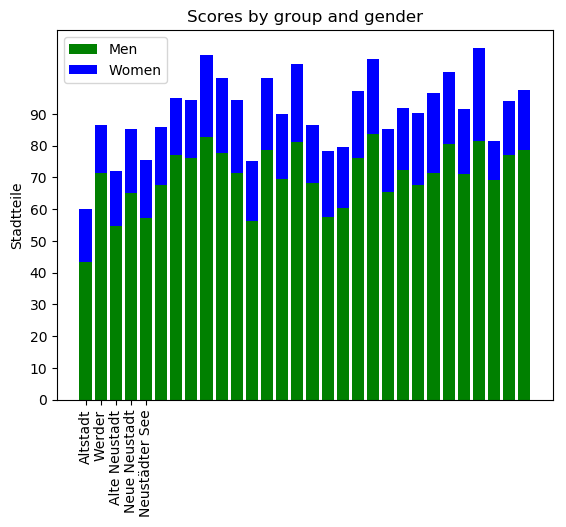

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

stadtteile = (tuple(list(magdeb007["STD_name"]))) #Ich veränder das DataFrame in eine list, welche ich in eine tulpe verwandel
y_pos = np.arange(len(stadtteile))
MA_2004 = tuple(list(magdeb007["MAQ_V_AQ_2004"]))
J_2004 = tuple(list(magdeb007["JQ_2004"]))


# Bars
bar_ma = plt.bar(y_pos, MA_2004, color="green")
bar_j = plt.bar(y_pos, J_2004, bottom=MA_2004, color="blue")




plt.ylabel('Stadtteile')
plt.title('Scores by group and gender')
plt.xticks(ind, stadtteile, rotation=90)
plt.yticks(np.arange(0, 100, 10))
plt.legend((bar_ma[0], bar_j[0]), ('Men', 'Women'))

plt.show()

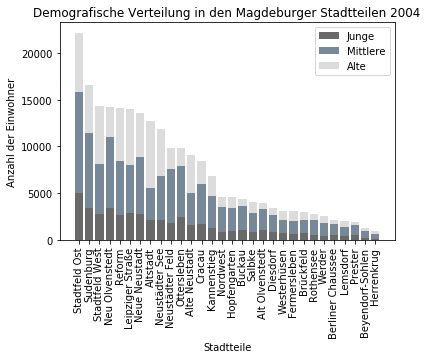

In [11]:
junge = magdeb007.sort_values('EW_2004',ascending=False)["J_AW_2004"]
mittlere = magdeb007.sort_values('EW_2004',ascending=False)['MA_AW_2004']
alte = magdeb007.sort_values('EW_2004',ascending=False)['A_AW_2004']

serie1 = plt.bar(range(len(magdeb007)), junge, color='DimGrey')
serie2 = plt.bar(range(len(magdeb007)), mittlere, bottom=junge, color='LightSlateGray') 
serie3 = plt.bar(range(len(magdeb007)), alte, bottom=junge+mittlere, color='Gainsboro') 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('EW_2004',ascending=False)['STD_name'], rotation=90) 
plt.title('Demografische Verteilung in den Magdeburger Stadtteilen 2004') 
plt.xlabel('Stadtteile') 
plt.ylabel('Anzahl der Einwohner') 
plt.legend((serie1,serie2,serie3), ('Junge','Mittlere','Alte')) 
plt.show() 

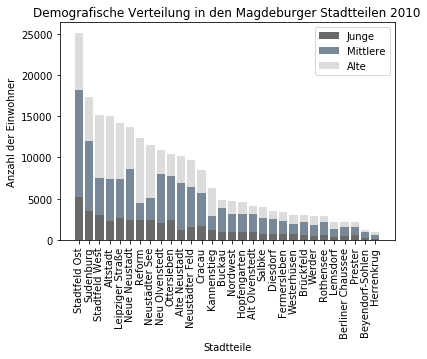

In [12]:
junge = magdeb007.sort_values('EW_2010',ascending=False)["J_AW_2010"]
mittlere = magdeb007.sort_values('EW_2010',ascending=False)['MA_AW_2010']
alte = magdeb007.sort_values('EW_2010',ascending=False)['A_AW_2010']

serie1 = plt.bar(range(len(magdeb007)), junge, color='DimGrey') 
serie2 = plt.bar(range(len(magdeb007)), mittlere, bottom=junge, color='LightSlateGray') 
serie3 = plt.bar(range(len(magdeb007)), alte, bottom=junge+mittlere, color='Gainsboro') 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('EW_2010',ascending=False)['STD_name'], rotation=90) 
plt.title('Demografische Verteilung in den Magdeburger Stadtteilen 2010') 
plt.xlabel('Stadtteile') 
plt.ylabel('Anzahl der Einwohner') 
plt.legend((serie1,serie2,serie3), ('Junge','Mittlere','Alte')) 
plt.show() 

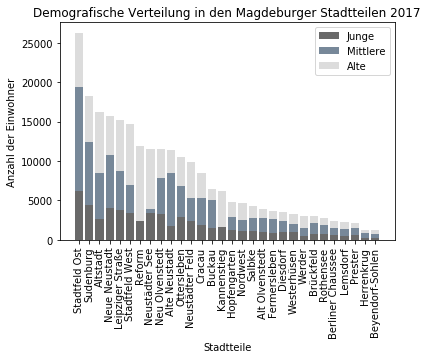

In [13]:
junge = magdeb007.sort_values('EW_2017',ascending=False)["J_AW_2017"]
mittlere = magdeb007.sort_values('EW_2017',ascending=False)['MA_AW_2017']
alte = magdeb007.sort_values('EW_2017',ascending=False)['A_AW_2017']

serie1 = plt.bar(range(len(magdeb007)), junge, color='DimGrey') 
serie2 = plt.bar(range(len(magdeb007)), mittlere, bottom=junge, color='LightSlateGray') 
serie3 = plt.bar(range(len(magdeb007)), alte, bottom=junge+mittlere, color='Gainsboro') 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('EW_2017',ascending=False)['STD_name'], rotation=90) 
plt.title('Demografische Verteilung in den Magdeburger Stadtteilen 2017') 
plt.xlabel('Stadtteile') 
plt.ylabel('Anzahl der Einwohner') 
plt.legend((serie1,serie2,serie3), ('Junge','Mittlere','Alte')) 
plt.show() 

### 3.2 Segregationsindex für alle drei Altersgruppen in den Jahren 2004, 2010 und 2017

#### Schritt 6 - Altersegregation für alle drei Altersgruppen 

In [14]:
# Altersegregation für Personen unter 15 Jahren

# Anteil der Personen unter 15 Jahren in den Stadtteilen
# 2004
magdeb007["rel_age_J"] = magdeb007["J_AW_2004"] / J_2004_sum # Relativer Anteil an unter 15 Jährigen in den Stadtteilen
magdeb007["rel_age_noJ"] = (magdeb007["EW_2004"] - magdeb007["J_AW_2004"]) / (EW_2004_sum - J_2004_sum) # Relativer Anteil an nicht unter 15 Jährigen in den Stadtteilen

magdeb007["verh_age_J_rest"] = abs(magdeb007["rel_age_J"] - magdeb007["rel_age_noJ"]) #Rechnung hinter dem Summenzeichen

segIndex_age_J = 0.5 * magdeb007["verh_age_J_rest"].sum() # Summe bilden
segIndex_age_J_round = round(segIndex_age_J, 2) # Runden des Segregationsindex

print("Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2004: " + str(segIndex_age_J_round))

# 2010
magdeb007["rel_age_J"] = magdeb007["J_AW_2010"] / J_2010_sum # Relativer Anteil an unter 15 Jährigen in den Stadtteilen
magdeb007["rel_age_noJ"] = (magdeb007["EW_2010"] - magdeb007["J_AW_2010"]) / (EW_2010_sum - J_2010_sum) # Relativer Anteil an nicht unter 15 Jährigen in den Stadtteilen

magdeb007["verh_age_J_rest"] = abs(magdeb007["rel_age_J"] - magdeb007["rel_age_noJ"]) #Rechnung hinter dem Summenzeichen

segIndex_age_J = 0.5 * magdeb007["verh_age_J_rest"].sum() # Summe bilden
segIndex_age_J_round = round(segIndex_age_J, 2) # Runden des Segregationsindex

print("Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2010: " + str(segIndex_age_J_round))

# 2017
magdeb007["rel_age_J"] = magdeb007["J_AW_2017"] / J_2017_sum # Relativer Anteil an unter 15 Jährigen in den Stadtteilen
magdeb007["rel_age_noJ"] = (magdeb007["EW_2017"] - magdeb007["J_AW_2017"]) / (EW_2017_sum - J_2017_sum) # Relativer Anteil an nicht unter 15 Jährigen in den Stadtteilen

magdeb007["verh_age_J_rest"] = abs(magdeb007["rel_age_J"] - magdeb007["rel_age_noJ"]) #Rechnung hinter dem Summenzeichen

segIndex_age_J = 0.5 * magdeb007["verh_age_J_rest"].sum() # Summe bilden
segIndex_age_J_round = round(segIndex_age_J, 2) # Runden des Segregationsindex

print("Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2017: " + str(segIndex_age_J_round))
print("")

# Altersegregation für Personen zwischen 15 und 65 Jahren
# 2004
magdeb007["rel_age_MA"] = magdeb007["MA_AW_2004"] / MA_2004_sum
magdeb007["rel_age_noJ"] = (magdeb007["EW_2004"] - magdeb007["MA_AW_2004"]) / (EW_2004_sum - MA_2004_sum)

magdeb007["verh_age_MA_rest"] = abs(magdeb007["rel_age_MA"] - magdeb007["rel_age_noJ"])

segIndex_age_MA = 0.5 * magdeb007["verh_age_MA_rest"].sum()
segIndex_age_MA_round = round(segIndex_age_MA, 2)

print("Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2004: " + str(segIndex_age_MA_round))


# 2010
magdeb007["rel_age_MA"] = magdeb007["MA_AW_2010"] / MA_2010_sum
magdeb007["rel_age_noJ"] = (magdeb007["EW_2010"] - magdeb007["MA_AW_2010"]) / (EW_2010_sum - MA_2010_sum)

magdeb007["verh_age_MA_rest"] = abs(magdeb007["rel_age_MA"] - magdeb007["rel_age_noJ"])

segIndex_age_MA = 0.5 * magdeb007["verh_age_MA_rest"].sum()
segIndex_age_MA_round = round(segIndex_age_MA, 2)

print("Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2010: " + str(segIndex_age_MA_round))


# 2017
magdeb007["rel_age_MA"] = magdeb007["MA_AW_2017"] / MA_2017_sum
magdeb007["rel_age_noJ"] = (magdeb007["EW_2017"] - magdeb007["MA_AW_2017"]) / (EW_2017_sum - MA_2017_sum)

magdeb007["verh_age_MA_rest"] = abs(magdeb007["rel_age_MA"] - magdeb007["rel_age_noJ"])

segIndex_age_MA = 0.5 * magdeb007["verh_age_MA_rest"].sum()
segIndex_age_MA_round = round(segIndex_age_MA, 2)

print("Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2017: " + str(segIndex_age_MA_round))
print("")

# Alterssegregation für Personen über 65 Jahren
# 2004
magdeb007["rel_age_A"] = magdeb007["A_AW_2004"] / A_2004_sum
magdeb007["rel_age_noJ"] = (magdeb007["EW_2004"] - magdeb007["A_AW_2004"]) / (EW_2004_sum - A_2004_sum)

magdeb007["verh_age_A_rest"] = abs(magdeb007["rel_age_A"] - magdeb007["rel_age_noJ"])

segIndex_age_A = 0.5 * magdeb007["verh_age_A_rest"].sum()
segIndex_age_A_round = round(segIndex_age_A, 2)

print("Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2004: " + str(segIndex_age_A_round))

# 2010
magdeb007["rel_age_A"] = magdeb007["A_AW_2010"] / A_2010_sum
magdeb007["rel_age_noJ"] = (magdeb007["EW_2010"] - magdeb007["A_AW_2010"]) / (EW_2010_sum - A_2010_sum)

magdeb007["verh_age_A_rest"] = abs(magdeb007["rel_age_A"] - magdeb007["rel_age_noJ"])

segIndex_age_A = 0.5 * magdeb007["verh_age_A_rest"].sum()
segIndex_age_A_round = round(segIndex_age_A, 2)

print("Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2010: " + str(segIndex_age_A_round))

# 2017
magdeb007["rel_age_A"] = magdeb007["A_AW_2017"] / A_2017_sum
magdeb007["rel_age_noJ"] = (magdeb007["EW_2017"] - magdeb007["A_AW_2017"]) / (EW_2017_sum - A_2017_sum)

magdeb007["verh_age_A_rest"] = abs(magdeb007["rel_age_A"] - magdeb007["rel_age_noJ"])

segIndex_age_A = 0.5 * magdeb007["verh_age_A_rest"].sum()
segIndex_age_A_round = round(segIndex_age_A, 2)

print("Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2017: " + str(segIndex_age_A_round))
print("")
print("Generell fällt der demografische Segregationsindex 2004 recht gering aus, mit zunehmenden Alter scheinen sich die Magdeburger aber stärker zu segrieren.")
print("Im Verlauf der Zeit hat die Segregation in allen Altersklassen zugenommen. Bis 2017 hat sich der demografische Segregationsindex im Vergleich zu 2004 in zwei von drei Altersklassen sich mehr als verdreifacht.")

Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2004: 0.06
Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2010: 0.06
Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2017: 0.07

Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2004: 0.15
Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2010: 0.2
Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2017: 0.26

Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2004: 0.19
Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2010: 0.22
Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2017: 0.24

Generell fällt der demografische Segregationsindex 2004 recht gering aus, mit zunehmenden Alter scheinen sich die Magdeburger aber stärker zu segrieren.
Im Verlauf der Zeit hat die Segregation in allen Altersklassen zugen

### 3.3 Anteile der Ausländischen Bevölkerung in den Jahren 2004, 2010 und 2017

Da die Daten der Ausländischen Bevölkerung ('ABEV') in absoluten Zahlen angegeben sind, müssen diese erst als Prozentzahl von der Gesamtbevölkerung berechnet werden.
Da außerdem die Ausländische Bevölkerung (ABEV) pro Stadtteil angegeben ist, muss zuerst die Gesamtzahl pro Jahr berechnet werden. Dazu werden alle Daten pro Stadtteil pro Jahr addiert und dann der Anteil an der Gesamtbevölkerung berechnet. 

In [21]:
#benötigte Variablen sind: ABEV_2004, ABEV_2010 und ABEV_2017 sowie EW_2004, EW_2010 und EW_2017

#Auswählen der Spalte 'EW_2004'
print(magdeb007['EW_2004'])

#Addieren der Werte und speichern in der neuen Variable sumEW_2004
sumEW_2004 = sum(magdeb007['EW_2004'])

print("Die Gesamteinwohnerzahl beträgt 2004:" + str(sumEW_2004))

#das Gleiche für die Variable ABEV_2004, also die Ausländische Bevölkerung im Jahr 2004
sumABEV_2004 = sum(magdeb007['ABEV_2004'])

print("Die Anzahl der Menschen mit Migrationshintergrund beträgt:" + str(sumABEV_2004))

#jetzt soll der Anteil der Ausländischen Bevölkerung im Jahr 2004 ausgerechnet werden
anteilABEV_2004 = (sumABEV_2004/sumEW_2004)*100

print('Der Anteil der Ausländischen Bevölkerung im Jahr 2004 beträgt:'+ str(anteilABEV_2004))
anteilABEV_2004_round = round (anteilABEV_2004, 1)

print('Der Anteil auf die erste Stelle hinter dem Komma gerundet lautet:')
print(anteilABEV_2004_round)


0     12786
1      2490
2      9050
3     13572
4     11902
5      6877
6      9828
7      4547
8      3945
9     14257
10    22225
11    14367
12     3418
13    16549
14     9795
15     2050
16    13981
17    14086
18     4528
19     4340
20     3108
21     3999
22     3121
23     3019
24     2134
25     8402
26     1891
27      913
28     2727
29     1232
Name: EW_2004, dtype: int64
Die Gesamteinwohnerzahl beträgt 2004:225139
Die Anzahl der Menschen mit Migrationshintergrund beträgt:8092
Der Anteil der Ausländischen Bevölkerung im Jahr 2004 beträgt:3.5942240127210296
Der Anteil auf die erste Stelle hinter dem Komma gerundet lautet:
3.6


In [17]:
#die gleiche Berechnung führen wir jetzt für die Zeitpunkte 2010 und 2017 durch. Zuerst für das Jahr 2010:
sumEW_2010 = sum(magdeb007['EW_2010'])

print("Die Gesamteinwohnerzahl beträgt im Jahr 2010: " + str(sumEW_2010))

sumABEV_2010 = sum(magdeb007['ABEV_2010'])
print("Die Anzahl der Menschen mit Migrationshintergrund im Jahr 2010 beträgt: " + str(sumABEV_2010))

anteilABEV_2010 = (sumABEV_2010/sumEW_2010)*100

print("Der Anteil der Menschen mit Migrationshintergrund ist: " + str(anteilABEV_2010))
anteilABEV_2010_round = round (anteilABEV_2010, 1)

print("Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: ")
print(anteilABEV_2010_round)

#jetzt noch für das Jahr 2017

sumEW_2017 = sum(magdeb007['EW_2017'])

print("Die Gesamteinwohnerzahl beträgt im Jahr 2017: " + str(sumEW_2017))

sumABEV_2017 = sum(magdeb007['ABEV_2017'])
print("Die Anzahl der Ausländischen Bevölkerung im Jahr 2017 beträgt: " + str(sumABEV_2017))

anteilABEV_2017 = (sumABEV_2017/sumEW_2017)*100

print("Der Anteil der Ausländischen Bevölkerung ist: " + str(anteilABEV_2017))
anteilABEV_2017_round = round (anteilABEV_2017, 1)

print("Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: ")
print(anteilABEV_2017_round)

Die Gesamteinwohnerzahl beträgt im Jahr 2010: 229705
Die Anzahl der Menschen mit Migrationshintergrund im Jahr 2010 beträgt: 8153
Der Anteil der Menschen mit Migrationshintergrund ist: 3.5493350166517925
Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: 
3.5
Die Gesamteinwohnerzahl beträgt im Jahr 2017: 240298
Die Anzahl der Menschen mit Migrationshintergrund im Jahr 2017 beträgt: 20636
Der Anteil der Menschen mit Migrationshintergrund ist: 8.58767030936587
Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: 
8.6


### 3.4 Segregationsindex für die Ausländische Bevölkerung in den Jahren 2004, 2010 und 2017

Nun wird der Segregationsindex für die Jahre 2004, 2010 und 2017 exemplarisch berechnet.


In [18]:
#für 2004:
sum_ABEV_2004 = magdeb007['ABEV_2004'].sum()
sum_EW_2004 = magdeb007['EW_2004'].sum()
print ("Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen:"
       +str(sum_ABEV_2004)+ "," + str(sum_EW_2004) )

#Anteile berechnen
magdeb007['anteilABEV_2004'] = magdeb007['ABEV_2004']/sum_ABEV_2004
magdeb007['anteilnichtABEV_2004'] = (magdeb007['EW_2004'] - magdeb007['ABEV_2004']) / (sum_EW_2004 - sum_ABEV_2004)
print(magdeb007)

#Verhältnis von ABEV_2004 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_ABEV_zu_EW_2004'] = abs(magdeb007['anteilABEV_2004']- magdeb007['anteilnichtABEV_2004'])
print(magdeb007)

#Segregationsindex berechnen
segIndex_04 = 0.5 * magdeb007['verh_ABEV_zu_EW_2004'].sum()
print('Der Segregationsindex beträgt:' + str(segIndex_04))

Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen:8092,225139
    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    22225

In [19]:
#für 2010:
sum_ABEV_2010 = magdeb007['ABEV_2010'].sum()
sum_EW_2010 = magdeb007['EW_2010'].sum()
print ("Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen:"
       +str(sum_ABEV_2010)+ "," + str(sum_EW_2010) )

#Anteile berechnen
magdeb007['anteilABEV_2010'] = magdeb007['ABEV_2010']/sum_ABEV_2010
magdeb007['anteilnichtABEV_2010'] = (magdeb007['EW_2010'] - magdeb007['ABEV_2010']) / (sum_EW_2010 - sum_ABEV_2010)
print(magdeb007)

#Verhältnis von ABEV_2010 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_ABEV_zu_EW_2010'] = abs(magdeb007['anteilABEV_2010']- magdeb007['anteilnichtABEV_2010'])
print(magdeb007)

#Segregationsindex berechnen
segIndex_10 = 0.5 * magdeb007['verh_ABEV_zu_EW_2010'].sum()
print('Der Segregationsindex beträgt:' + str(segIndex_10))

Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen:8153,229705
    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    22225

In [20]:
#für 2017:
sum_ABEV_2017 = magdeb007['ABEV_2017'].sum()
sum_EW_2017 = magdeb007['EW_2017'].sum()
print ("Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen:"
       +str(sum_ABEV_2017)+ "," + str(sum_EW_2017) )

#Anteile berechnen
magdeb007['anteilABEV_2017'] = magdeb007['ABEV_2017']/sum_ABEV_2017
magdeb007['anteilnichtABEV_2017'] = (magdeb007['EW_2017'] - magdeb007['ABEV_2017']) / (sum_EW_2017 - sum_ABEV_2017)
print(magdeb007)

#Verhältnis von ABEV_2017 zur Einwohnerzahl mithilfe der abs() Funktion berechnen
magdeb007['verh_ABEV_zu_EW_2017'] = abs(magdeb007['anteilABEV_2017']- magdeb007['anteilnichtABEV_2017'])
print(magdeb007)

#Segregationsindex berechnen
segIndex_17 = 0.5 * magdeb007['verh_ABEV_zu_EW_2017'].sum()
print('Der Segregationsindex beträgt:' + str(segIndex_17))

Auch die alternative Berechnung mittels Summenformel resultiert in den gleichen Ergebnissen:20636,240298
    STD_NR           STD_name  EW_2004  EW_2005  EW_2006  EW_2007  EW_2008  \
0        1           Altstadt    12786    13580    13892    14140    14532   
1        2             Werder     2490     2594     2691     2663     2709   
2        4      Alte Neustadt     9050     9183     9347     9534     9641   
3        6      Neue Neustadt    13572    13566    13583    13631    13757   
4        8     Neustädter See    11902    11784    11829    11784    11557   
5       10        Kannenstieg     6877     6735     6676     6594     6383   
6       12    Neustädter Feld     9828    10011     9980     9946     9847   
7       18           Nordwest     4547     4511     4522     4544     4609   
8       20     Alt Olvenstedt     3945     4111     4262     4278     4199   
9       22     Neu Olvenstedt    14257    13488    12733    12017    11741   
10      24      Stadtfeld Ost    2222

### 3.5 Verteilung der Anzahl der Ausländischen Bevölkerung in den Stadtteilen

Um die berechneten Segregationsindexe besser beurteilen zu können, ist es interessant sich die Anzahl der Ausländischen Bevölkerung in den jeweiligen Stadtteilen im Verlauf der Jahre von 2004-2017 anzeigen zu lassen. Dazu werden Diagramme für die Jahre 2004,2010,2014,2015 und 2017 erstellt.

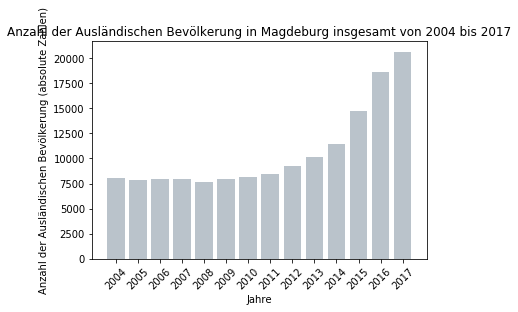

In [20]:
ABEV04bis17 = (sum(magdeb007['ABEV_2004']), 
                    sum(magdeb007['ABEV_2005']),
                    sum(magdeb007['ABEV_2006']),
                    sum(magdeb007['ABEV_2007']),
                    sum(magdeb007['ABEV_2008']),
                    sum(magdeb007['ABEV_2009']),
                    sum(magdeb007['ABEV_2010']),
                    sum(magdeb007['ABEV_2011']),
                    sum(magdeb007['ABEV_2012']),
                    sum(magdeb007['ABEV_2013']),
                    sum(magdeb007['ABEV_2014']),
                    sum(magdeb007['ABEV_2015']),
                    sum(magdeb007['ABEV_2016']),
                    sum(magdeb007['ABEV_2017']))


jahre = ('2004', '2005', '2006', '2007', '2008', '2009','2010','2011','2012','2013','2014','2015','2016','2017')
y_pos = np.arange(len(jahre))

 
plt.bar(y_pos, ABEV04bis17, align='center', alpha=0.5, color='LightSlateGray')
plt.xticks(y_pos, jahre, rotation=45)
plt.ylabel('Anzahl der Ausländischen Bevölkerung (absolute Zahlen)')
plt.xlabel('Jahre')
plt.title('Anzahl der Ausländischen Bevölkerung in Magdeburg insgesamt von 2004 bis 2017')

plt.show()

In dem Diagramm ist abzulesen, dass es ab 2012 einen deutlichen Anstieg der Ausländischen Bevölkerung in Magdeburg gab. Dies haben auch schon die Berechnungen der Anteile zuvor deutlich gemacht. Nun ist es interesant zu beobachten, wo sich dieser Anstieg geografisch in Magdeburg verordnet.

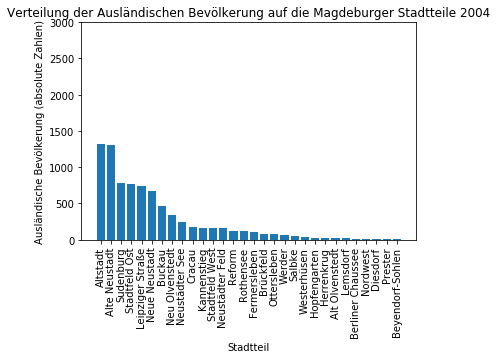

In [13]:
plt.bar(range(len(magdeb007)), magdeb007.sort_values('ABEV_2004',ascending=False)['ABEV_2004']) 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('ABEV_2004',ascending=False)['STD_name'], rotation=90)
plt.ylim((0,3000))
plt.title('Verteilung der Ausländischen Bevölkerung auf die Magdeburger Stadtteile 2004') 
plt.xlabel('Stadtteil') 
plt.ylabel('Ausländische Bevölkerung (absolute Zahlen)') 
plt.show() 

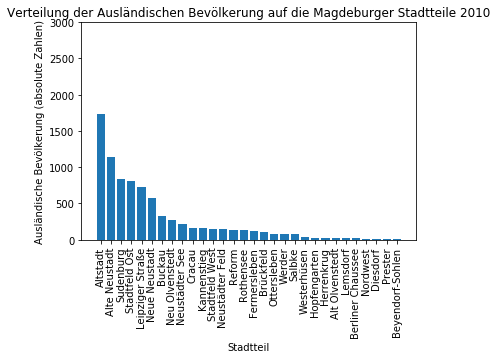

In [14]:
plt.bar(range(len(magdeb007)), magdeb007.sort_values('ABEV_2010',ascending=False)['ABEV_2010']) 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('ABEV_2004',ascending=False)['STD_name'], rotation=90) 
plt.ylim((0,3000))
plt.title('Verteilung der Ausländischen Bevölkerung auf die Magdeburger Stadtteile 2010') 
plt.xlabel('Stadtteil') 
plt.ylabel('Ausländische Bevölkerung (absolute Zahlen)') 
plt.show() 

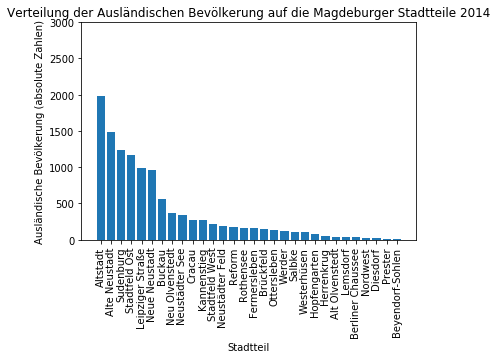

In [15]:
plt.bar(range(len(magdeb007)), magdeb007.sort_values('ABEV_2014',ascending=False)['ABEV_2014']) 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('ABEV_2004',ascending=False)['STD_name'], rotation=90) 
plt.ylim((0,3000))
plt.title('Verteilung der Ausländischen Bevölkerung auf die Magdeburger Stadtteile 2014') 
plt.xlabel('Stadtteil') 
plt.ylabel('Ausländische Bevölkerung (absolute Zahlen)') 
plt.show() 

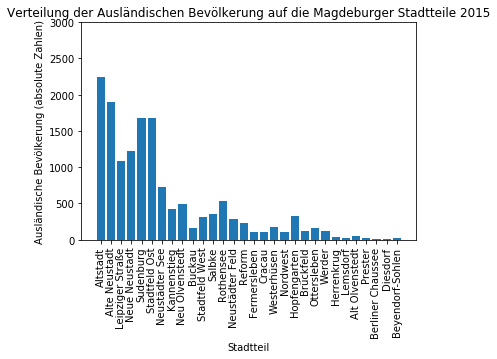

In [16]:
plt.bar(range(len(magdeb007)), magdeb007.sort_values('ABEV_2010',ascending=False)['ABEV_2015']) 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('ABEV_2015',ascending=False)['STD_name'], rotation=90) 
plt.ylim((0,3000))
plt.title('Verteilung der Ausländischen Bevölkerung auf die Magdeburger Stadtteile 2015') 
plt.xlabel('Stadtteil') 
plt.ylabel('Ausländische Bevölkerung (absolute Zahlen)') 
plt.show() 

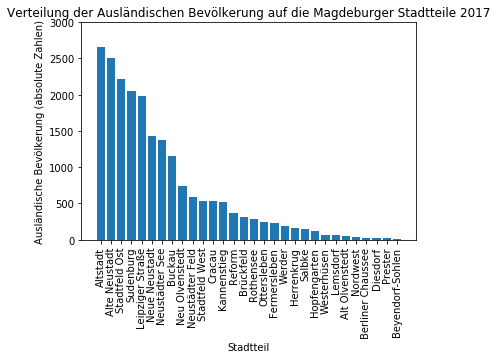

In [17]:
plt.bar(range(len(magdeb007)), magdeb007.sort_values('ABEV_2017',ascending=False)['ABEV_2017']) 
plt.xticks(range(len(magdeb007)), magdeb007.sort_values('ABEV_2007',ascending=False)['STD_name'], rotation=90) 
plt.ylim((0,3000))
plt.title('Verteilung der Ausländischen Bevölkerung auf die Magdeburger Stadtteile 2017') 
plt.xlabel('Stadtteil') 
plt.ylabel('Ausländische Bevölkerung (absolute Zahlen)') 
plt.show() 

Die Ausländische Bevölkerung verteilt sich nicht gleichmäßig in den Magedeburger Stadtteilen. Die größte Anzahl an Ausländischer Bevölkerung findet sich in den Stadtteilen Altstadt, Alte Neustadt und Sudenburg wieder. Ab 2015 kommt noch Stadtende Ost hinzu. 2017 ist die Anzahl an Ausländischer Bevölkerung in Stadtende Ost höher als in Sudenburg.

### 3.6 Korrelation zwischen der Ausländischen Bevölkerung und dem Durchschnittsalter

In [ ]:
import pandas as pd
magdeburg = pd.read_csv('MagdeburgBereinigterDatensatzVers007.csv', sep = ";", decimal=",")
magdeburg.head()

In [21]:
magdeb007['corABEV04'] = magdeb007 ['ABEV_2004'] / magdeb007['EW_2004']
magdeb007['corABEV10'] = magdeb007 ['ABEV_2010'] / magdeb007['EW_2010']
magdeb007['corABEV17'] = magdeb007 ['ABEV_2017'] / magdeb007['EW_2017']
magdeb007.head()

,STD_NR,STD_name,EW_2004,EW_2005,EW_2006,EW_2007,EW_2008,EW_2009,EW_2010,EW_2011,...,verh_ABEV_zu_EW_2004,anteilABEV_2010,anteilnichtABEV_2010,verh_ABEV_zu_EW_2010,anteilABEV_2017,anteilnichtABEV_2017,verh_ABEV_zu_EW_2017,corABEV04,corABEV10,corABEV17
0,1,Altstadt,12786,13580,13892,14140,14532,14863,14982,15263,...,0.109784,0.213296,0.059774,0.153522,0.121244,0.062337,0.058908,0.102925,0.116073,0.154492
1,2,Werder,2490,2594,2691,2663,2709,2759,2893,2964,...,0.003653,0.009076,0.012724,0.003647,0.007269,0.013138,0.005870,0.024498,0.025579,0.049407
2,4,Alte Neustadt,9050,9183,9347,9534,9641,9794,10124,10321,...,0.125971,0.139335,0.040568,0.098767,0.099292,0.042684,0.056609,0.144530,0.112209,0.179344
3,6,Neue Neustadt,13572,13566,13583,13631,13757,13684,13674,13765,...,0.024124,0.070771,0.059115,0.011657,0.128901,0.059473,0.069428,0.049808,0.042197,0.169168
4,8,Neustädter See,11902,11784,11829,11784,11557,11608,11568,11529,...,0.023815,0.039372,0.050765,0.011393,0.069199,0.046189,0.023010,0.020333,0.027749,0.123380


-0.01


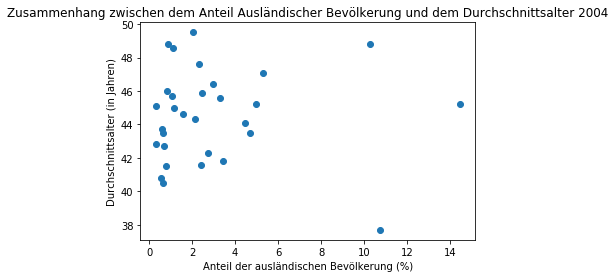

-0.27


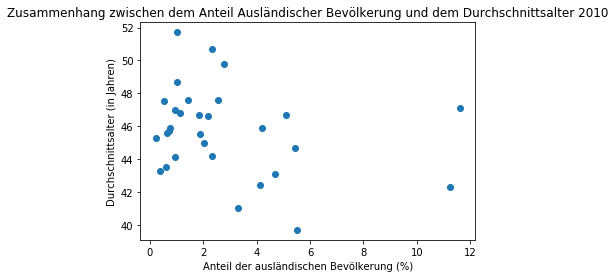

-0.42


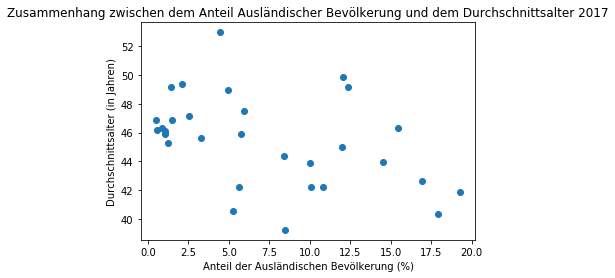

In [32]:
cor04 = magdeb007['corABEV04'].corr(magdeb007['DA_2004'])

print (round(cor04, 2))
plt.scatter(magdeb007['corABEV04']*100, magdeb007['DA_2004'])
plt.xlabel('Anteil der ausländischen Bevölkerung (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter 2004')
plt.show()

cor10 = magdeb007['corABEV10'].corr(magdeb007['DA_2010'])
print (round(cor10, 2))
plt.scatter(magdeb007['corABEV10']*100, magdeb007['DA_2010'])
plt.xlabel('Anteil der ausländischen Bevölkerung (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter 2010')
plt.show()

cor17 = magdeb007['corABEV17'].corr(magdeb007['DA_2017'])
print (round(cor17, 2))
plt.scatter(magdeb007['corABEV17']*100, magdeb007['DA_2017'])
plt.xlabel('Anteil der Ausländischen Bevölkerung (%)')
plt.ylabel('Durchschnittsalter (in Jahren)')
plt.title('Zusammenhang zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter 2017')
plt.show()

### 3.7 Anteile der männlichen und weiblichen Bevölkerung in Magdeburg

In [27]:
#für 2004
#Addieren der Werte von EW_2004 und speichern in der neuen Variable sumEW_2004
sumEW_2004 = sum(magdeb007['EW_2004'])

#das Gleiche für die Variable MBEV_2004
sumMBEV_2004 = sum(magdeb007['MBEV_2004'])

#jetzt soll der Anteil der Männlichen Bevölkerung im Jahr 2004 ausgerechnet werden
anteilMBEV_2004 = (sumMBEV_2004/sumEW_2004)*100

print('Der Anteil der Männlichen Bevölkerung im Jahr 2004 in Prozent beträgt:'+ str(anteilMBEV_2004))
#Anteil der Weiblichen Bevölkerung entsprechend:
sumWBEV_2004 = sum(magdeb007['WBEV_2004'])
anteilWBEV_2004 = (sumWBEV_2004/sumEW_2004)*100

print('Der Anteil der Weiblichen Bevölkerung im Jahr 2004 in Prozent beträgt:'+ str(anteilWBEV_2004))


Der Anteil der Männlichen Bevölkerung im Jahr 2004 in Prozent beträgt:48.09961845793043
Der Anteil der Weiblichen Bevölkerung im Jahr 2004 in Prozent beträgt:51.90038154206956


In [28]:
#Addieren der Werte von EW_2010 und speichern in der neuen Variable sumEW_2010
sumEW_2010 = sum(magdeb007['EW_2010'])

#das Gleiche für die Variable MBEV_2010
sumMBEV_2010 = sum(magdeb007['MBEV_2010'])

#jetzt soll der Anteil der Männlichen Bevölkerung im Jahr 2010 ausgerechnet werden
anteilMBEV_2010 = (sumMBEV_2010/sumEW_2010)*100

print('Der Anteil der Männlichen Bevölkerung im Jahr 2010 in Prozent beträgt:'+ str(anteilMBEV_2010))
#Anteil der Weiblichen Bevölkerung entsprechend:
sumWBEV_2010 = sum(magdeb007['WBEV_2010'])
anteilWBEV_2010 = (sumWBEV_2010/sumEW_2010)*100

print('Der Anteil der Weiblichen Bevölkerung im Jahr 2010 in Prozent beträgt:'+ str(anteilWBEV_2010))



Der Anteil der Männlichen Bevölkerung im Jahr 2010 in Prozent beträgt:48.59667834831632
Der Anteil der Weiblichen Bevölkerung im Jahr 2010 in Prozent beträgt:51.40332165168368


In [29]:
#Addieren der Werte von EW_2017 und speichern in der neuen Variable sumEW_2017
sumEW_2017 = sum(magdeb007['EW_2017'])

#das Gleiche für die Variable MBEV_2017
sumMBEV_2017 = sum(magdeb007['MBEV_2017'])

#jetzt soll der Anteil der Männlichen Bevölkerung im Jahr 2017 ausgerechnet werden
anteilMBEV_2017 = (sumMBEV_2017/sumEW_2017)*100

print('Der Anteil der Männlichen Bevölkerung im Jahr 2017 in Prozent beträgt:'+ str(anteilMBEV_2017))
#Anteil der Weiblichen Bevölkerung entsprechend:
sumWBEV_2017 = sum(magdeb007['WBEV_2017'])
anteilWBEV_2017 = (sumWBEV_2017/sumEW_2017)*100

print('Der Anteil der Weiblichen Bevölkerung im Jahr 2017 in Prozent beträgt:'+ str(anteilWBEV_2017))


Der Anteil der Männlichen Bevölkerung im Jahr 2017 in Prozent beträgt:49.49687471389691
Der Anteil der Weiblichen Bevölkerung im Jahr 2017 in Prozent beträgt:50.50312528610309


Der Anteil der männlichen sowie weiblichen Bevölkerung verändert sich nur minimal im Laufe der Jahre.

## 4. Ergebnisse

Die Stadt Magdeburg verzeichnet seit 2004 einen kontinuierlichen Anstieg der Bevölkerung.
Schwankte die Zahl zwischen 2005 (227.316 Einwohner) bis 2010 (229.705 Einwohner) um lediglich 2.389 Personen, so nahm sie im Zeitraum von 2010 bis 2017 (240.298 Einwohner) um 10.593 Personen zu. Insgesamt stieg die Einwohnerzahl zwischen 2004 und 2017 um 15.159 Personen an.

Die Anzahl der Personen unter 15 Jahren erhöhte sich von 45.865 Jugendliche im Jahr 2004 auf 57.748 Jugendliche im Jahr 2017. Im Jahr 2010 nahm sie verglichen mit  2004 um 2.443 Jugendliche ab. Das bedeutet eine Zuwachs im Jahr 2017 um 11.883 Jugendliche verglichen mit 2004 und einen Zuwachs um 14.326 Jugendliche verglichen mit 2010.

Die Personenzahl Mittleren Alters reduzierte sich von 105.259 im Jahr 2004, auf 99.222 im Jahr 2010, um im Jahr 2017 bei 84.796 zu liegen. Das bedeutet für das Jahr 2017 einen Rückgang um 20.463 Einwohner verglichen mit 2004.

Die Personenzahl der über 65-jährigen Senioren wuchs von 74.017 im Jahr 2004 auf 87.059 im Jahr 2010. 2017 lag sie bei 97.751. Das entspricht einem Anstieg von 23.734 Menschen im Jahr 2017 verglichen mit dem Jahr 2004.

Im Jahr 2004 betrug der Anteil an Personen unter 15 Jahren: 20.37%. Der Anteil der Personen zwischen 15 und 65 Jahren betrug: 46.75% und der Anteil an Personen über 65 Jahren betrug: 32.88%.

Im Jahr 2010 betrug der Anteil an Personen unter 15 Jahren: 18.9%. Der Anteil der Personen zwischen 15 und 65 Jahren betrug: 43.2%, und der Anteil an Personen über 65 Jahren betrug: 37.9%.

Im Jahr 2017 betrug der Anteil an Personen unter 15 Jahren: 24.03%. Der Anteil der Personen zwischen 15 und 65 Jahren betrug: 35.29%, und der Anteil an Personen über 65 Jahren betrug: 40.68%.
Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2004: 0.06
Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2010: 0.06
Der demografische Segregationsindex für Personen unter 15 Jahren beträgt 2017: 0.07

Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2004: 0.15
Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2010: 0.2
Der demografische Segregationsindex für Personen zwischen 15 und 65 Jahren beträgt 2017: 0.26

Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2004: 0.19
Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2010: 0.22
Der demografische Segregationsindex für Personen ab 65 Jahren beträgt 2017: 0.24

Die Gesamteinwohnerzahl beträgt 2004: 225.139
Die Anzahl der Menschen mit Migrationshintergrund beträgt: 8.092
Der Anteil der Ausländischen Bevölkerung im Jahr 2004 beträgt: 3.5942240127210296 %
Der Anteil auf die erste Stelle hinter dem Komma gerundet lautet: 3.6%

Die Gesamteinwohnerzahl beträgt im Jahr 2010: 229.705
Die Anzahl der Menschen mit Migrationshintergrund im Jahr 2010 beträgt: 8.153
Der Anteil der Menschen mit Migrationshintergrund ist: 3.5493350166517925%
Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: 3.5%


Die Gesamteinwohnerzahl beträgt im Jahr 2017: 240.298
Die Anzahl der Menschen mit Migrationshintergrund im Jahr 2017 beträgt: 20.636
Der Anteil der Menschen mit Migrationshintergrund ist: 8.58767030936587%
Der Anteil auf die erste Stelle hinter dem Komma gerundet beträgt: 8.6%

Der Segregationsindex für die Ausländische Bevölkerung in den Jahren 2004 beträgt: 0.35636218220271937, für 2010: 0.33795014313396116 und für 2017: 0.3152034745432581.

Der Korrelationskoeffizient für das Jahr 2004 zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter liegt bei r= -.01.
Für das Jahr 2010 liegt er bei r= -.27. Für das Jahr 2017 bei r= -.42. Es besteht eine linearere, negative. mittlere Effektstärke im Jahr 2017 zwischen dem Anteil Ausländischer Bevölkerung und dem Durchschnittsalter.
